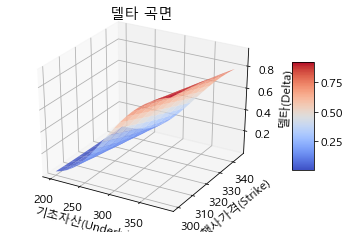

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import stats
%matplotlib inline

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus']=False


def call_delta(S,K,ttm,r,sigma):
    d1 = (np.log(S/K) + (r+sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    val = stats.norm.cdf(d1,0.0,1.0)
    return val

K=np.arange(300,350,5)
S=np.arange(200,400,10)
K,S = np.meshgrid(K,S)
Z = call_delta(S,K,0.38,0.02,0.30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.coolwarm, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('행사가격(Strike)')
ax.set_zlabel('델타(Delta)')
ax.set_title('델타 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

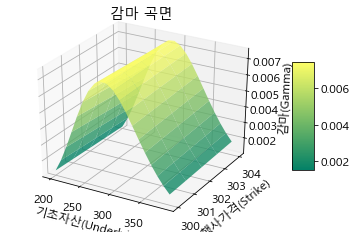

In [12]:
#N'(x)구하기
def ndx(x) :
    return (np.exp(-1* x**2 *0.5)/np.sqrt(2*np.pi))

def gamma(S,K,ttm,r,sigma):
    d1 = (np.log(S/K) + (r+sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    val= (ndx(d1)) /(S*sigma*np.sqrt(ttm))
    return val

K=np.arange(300,305)
S=np.arange(200,400,10)
K,S = np.meshgrid(K,S)
Z = gamma(S,K,0.38,0.02,0.30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(S, K, Z, cmap=cm.summer, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('행사가격(Strike)')
ax.set_zlabel('감마(Gamma)')
ax.set_title('감마 곡면')
          
fig.colorbar(surf, shrink=0.5, aspect=5)

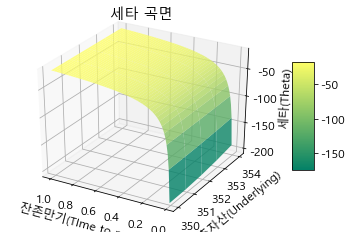

In [14]:
def call_theta(S,K,ttm,r,sigma):
    d1 = (np.log(S/K)+(r+sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    d2 = (np.log(S/K)+(r-sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    val = -1*((S*(ndx(d1)*sigma)/(2*np.sqrt(ttm)))-r*K*np.exp(-r*ttm)*stats.norm.cdf(d2,0.0,1.0))
    return val

#세타만의 특이한 점
T = np.arange(1.0, 0.0, -0.01)
S = np.arange(350,355)
T,S = np.meshgrid(T,S)
Z = call_theta(S,350,T,0.02,0.30)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(T,S,Z,cmap=cm.summer, linewidth=1,antialiased=True, alpha=0.8)

ax.set_xlabel('잔존만기(TIme to maturity)')
ax.set_ylabel('기초자산(Underlying)')
ax.set_zlabel('세타(Theta)')
ax.invert_xaxis() #x축은 1부터 0의 순서로 거꾸로 출력
ax.set_title('세타 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)

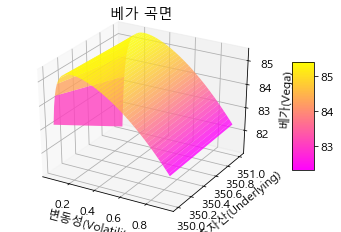

In [16]:
#베가 그래프

def vega(S,K,ttm,r,sigma):
    d1 = (np.log(S/K)+(r+sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    d2 = (np.log(S/K)+(r-sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    val = (S*np.sqrt(ttm)*ndx(d1))
    return val

V = np.arange(0.05, 0.95, 0.01)
S = np.arange(350,352)
V,S = np.meshgrid(V,S)
Z=vega(S,350,0.38,0.02,V)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(V,S,Z, cmap=cm.spring, linewidth=1, antialiased=True, alpha=0.8)

ax.set_xlabel('변동성(Volatility)')
ax.set_ylabel('기초자산(Underlying)')
ax.set_zlabel('베가(Vega)')
ax.set_title('베가 곡면')

fig.colorbar(surf, shrink=0.5, aspect=5)